# Real Weather REST API Tutorial with Open-Meteo

## Why Open-Meteo?

Open-Meteo is perfect for learning REST APIs because:
- **NO API key required** - Start immediately!
- **NO registration or credit card** needed
- **Free for non-commercial use** with generous limits (10,000+ requests/day)
- **Global coverage** with data from NOAA, DWD, MeteoFrance, ECMWF, and more
- **High accuracy** with 1-11km resolution
- **Simple JSON responses** that are easy to understand

### API Documentation
Full documentation: https://open-meteo.com/en/docs

### Key Concepts We'll Learn:
1. Making HTTP requests to real APIs
2. Working with query parameters
3. Parsing JSON responses
4. Error handling
5. Building practical weather applications

In [2]:
# Import required libraries
import requests
import json
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

# Base URL for Open-Meteo API
BASE_URL = "https://api.open-meteo.com/v1"

## 1. Basic Weather Request - Current Conditions

Let's start with a simple request for current weather in New York City.

In [3]:
# Define location (New York City)
latitude = 40.7128
longitude = -74.0060

# Build the API endpoint
url = f"{BASE_URL}/forecast"

# Define parameters
params = {
    "latitude": latitude,
    "longitude": longitude,
    "current": "temperature_2m,wind_speed_10m,relative_humidity_2m",
    "temperature_unit": "fahrenheit",
    "wind_speed_unit": "mph"
}

# Make the request
response = requests.get(url, params=params)

# Check status and display results
print(f"Status Code: {response.status_code}")
print(f"URL Called: {response.url}\n")

if response.status_code == 200:
    data = response.json()
    print("Current Weather in New York City:")
    print(f"Temperature: {data['current']['temperature_2m']}°F")
    print(f"Wind Speed: {data['current']['wind_speed_10m']} mph")
    print(f"Humidity: {data['current']['relative_humidity_2m']}%")
    print(f"Time: {data['current']['time']}")

Status Code: 200
URL Called: https://api.open-meteo.com/v1/forecast?latitude=40.7128&longitude=-74.006&current=temperature_2m%2Cwind_speed_10m%2Crelative_humidity_2m&temperature_unit=fahrenheit&wind_speed_unit=mph

Current Weather in New York City:
Temperature: 71.0°F
Wind Speed: 7.9 mph
Humidity: 61%
Time: 2025-07-04T12:15


## 2. Understanding the Response Structure

Let's examine the complete response structure:

In [4]:
# Pretty print the entire response
print("Full API Response:")
print(json.dumps(data, indent=2))

# Analyze the structure
print("\nResponse Keys:")
for key in data.keys():
    print(f"- {key}: {type(data[key]).__name__}")

Full API Response:
{
  "latitude": 40.710335,
  "longitude": -73.99309,
  "generationtime_ms": 0.053763389587402344,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 32.0,
  "current_units": {
    "time": "iso8601",
    "interval": "seconds",
    "temperature_2m": "\u00b0F",
    "wind_speed_10m": "mp/h",
    "relative_humidity_2m": "%"
  },
  "current": {
    "time": "2025-07-04T12:15",
    "interval": 900,
    "temperature_2m": 71.0,
    "wind_speed_10m": 7.9,
    "relative_humidity_2m": 61
  }
}

Response Keys:
- latitude: float
- longitude: float
- generationtime_ms: float
- utc_offset_seconds: int
- timezone: str
- timezone_abbreviation: str
- elevation: float
- current_units: dict
- current: dict


## 3. Hourly Weather Forecast

Get detailed hourly forecasts for the next 24 hours:

In [5]:
# Request hourly data
params = {
    "latitude": latitude,
    "longitude": longitude,
    "hourly": "temperature_2m,precipitation,cloud_cover,wind_speed_10m",
    "temperature_unit": "fahrenheit",
    "wind_speed_unit": "mph",
    "forecast_days": 1  # Just today
}

response = requests.get(url, params=params)
data = response.json()

# Convert to DataFrame for easier analysis
hourly_data = pd.DataFrame({
    'time': pd.to_datetime(data['hourly']['time']),
    'temperature': data['hourly']['temperature_2m'],
    'precipitation': data['hourly']['precipitation'],
    'cloud_cover': data['hourly']['cloud_cover'],
    'wind_speed': data['hourly']['wind_speed_10m']
})

print("Next 24 Hours Forecast:")
print(hourly_data.head(10))  # First 10 hours

Next 24 Hours Forecast:
                 time  temperature  precipitation  cloud_cover  wind_speed
0 2025-07-04 00:00:00         73.5            0.1           99         5.6
1 2025-07-04 01:00:00         73.3            0.0           44         2.6
2 2025-07-04 02:00:00         73.3            0.0            0         7.4
3 2025-07-04 03:00:00         71.4            0.0            0         3.0
4 2025-07-04 04:00:00         70.2            0.0            0         2.6
5 2025-07-04 05:00:00         69.2            0.0            0         3.5
6 2025-07-04 06:00:00         69.4            0.0            0         4.9
7 2025-07-04 07:00:00         67.1            0.0            0         4.6
8 2025-07-04 08:00:00         66.1            0.0            0         3.7
9 2025-07-04 09:00:00         65.2            0.0            0         3.6


## 4. Visualizing Weather Data

Create a simple weather forecast visualization:

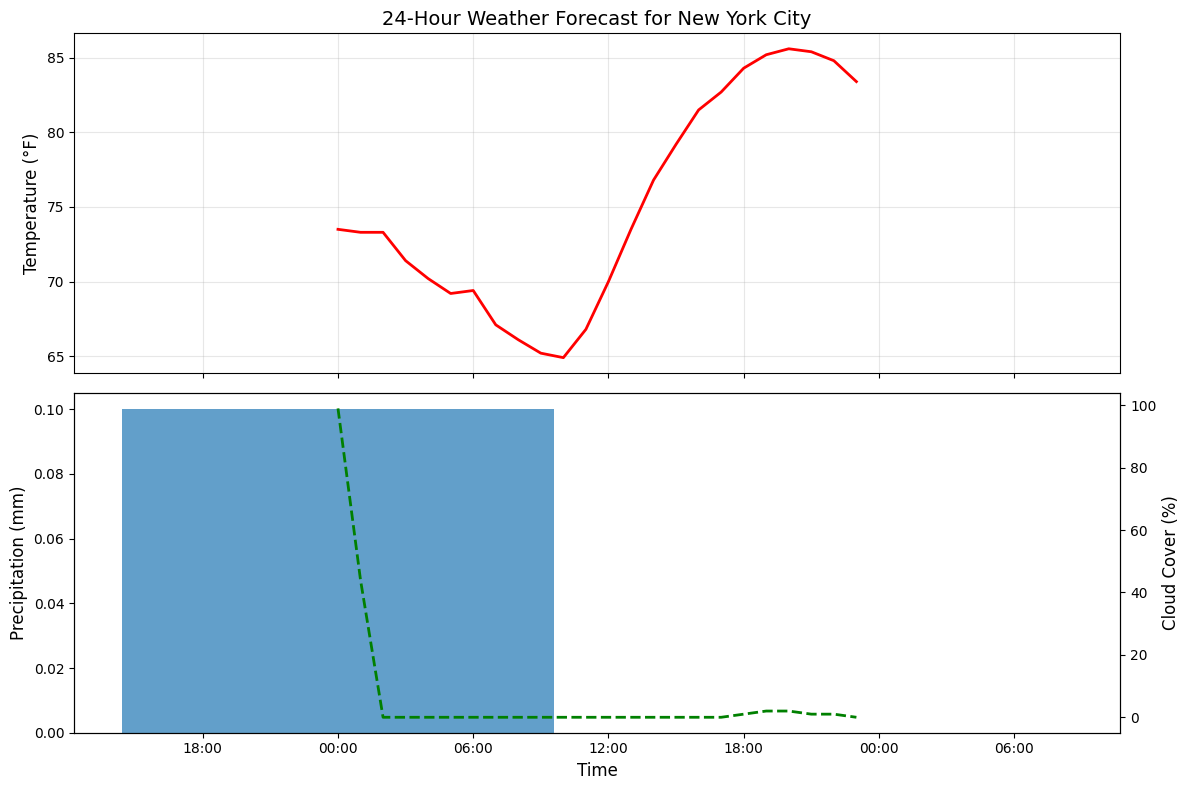

In [6]:
# Create a weather forecast plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Temperature plot
ax1.plot(hourly_data['time'], hourly_data['temperature'], 'r-', linewidth=2)
ax1.set_ylabel('Temperature (°F)', fontsize=12)
ax1.set_title('24-Hour Weather Forecast for New York City', fontsize=14)
ax1.grid(True, alpha=0.3)

# Precipitation and cloud cover
ax2.bar(hourly_data['time'], hourly_data['precipitation'], 
        alpha=0.7, label='Precipitation (mm)')
ax2_twin = ax2.twinx()
ax2_twin.plot(hourly_data['time'], hourly_data['cloud_cover'], 
              'g--', linewidth=2, label='Cloud Cover (%)')

ax2.set_ylabel('Precipitation (mm)', fontsize=12)
ax2_twin.set_ylabel('Cloud Cover (%)', fontsize=12)
ax2.set_xlabel('Time', fontsize=12)

# Format x-axis
import matplotlib.dates as mdates
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 5. Working with Multiple Locations

Compare weather across different cities:

In [7]:
# Define multiple cities
cities = [
    {"name": "New York", "lat": 40.7128, "lon": -74.0060},
    {"name": "London", "lat": 51.5074, "lon": -0.1278},
    {"name": "Tokyo", "lat": 35.6762, "lon": 139.6503},
    {"name": "Sydney", "lat": -33.8688, "lon": 151.2093}
]

# Fetch current weather for all cities
city_weather = []

for city in cities:
    params = {
        "latitude": city["lat"],
        "longitude": city["lon"],
        "current": "temperature_2m,weather_code,wind_speed_10m",
        "temperature_unit": "fahrenheit"
    }
    
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        city_weather.append({
            "city": city["name"],
            "temperature": data["current"]["temperature_2m"],
            "weather_code": data["current"]["weather_code"],
            "wind_speed": data["current"]["wind_speed_10m"],
            "time": data["current"]["time"]
        })

# Display results
weather_df = pd.DataFrame(city_weather)
print("Current Weather Around the World:")
print(weather_df)

Current Weather Around the World:
       city  temperature  weather_code  wind_speed              time
0  New York         71.0             0        12.7  2025-07-04T12:15
1    London         75.3             0        13.7  2025-07-04T12:15
2     Tokyo         78.3             1         4.5  2025-07-04T12:15
3    Sydney         48.6             0         3.0  2025-07-04T12:15


## 6. Weather Codes and Descriptions

Open-Meteo uses WMO weather codes. Let's decode them:

In [8]:
# Weather code descriptions
weather_codes = {
    0: "Clear sky",
    1: "Mainly clear",
    2: "Partly cloudy",
    3: "Overcast",
    45: "Fog",
    48: "Depositing rime fog",
    51: "Light drizzle",
    53: "Moderate drizzle",
    55: "Dense drizzle",
    61: "Slight rain",
    63: "Moderate rain",
    65: "Heavy rain",
    71: "Slight snow",
    73: "Moderate snow",
    75: "Heavy snow",
    77: "Snow grains",
    80: "Slight rain showers",
    81: "Moderate rain showers",
    82: "Violent rain showers",
    85: "Slight snow showers",
    86: "Heavy snow showers",
    95: "Thunderstorm",
    96: "Thunderstorm with slight hail",
    99: "Thunderstorm with heavy hail"
}

# Add weather descriptions to our city data
weather_df['description'] = weather_df['weather_code'].map(weather_codes)
print("\nWeather with Descriptions:")
print(weather_df[['city', 'temperature', 'description', 'wind_speed']])


Weather with Descriptions:
       city  temperature   description  wind_speed
0  New York         71.0     Clear sky        12.7
1    London         75.3     Clear sky        13.7
2     Tokyo         78.3  Mainly clear         4.5
3    Sydney         48.6     Clear sky         3.0


## 7. Historical Weather Data

Open-Meteo also provides historical weather data:

In [9]:
# Get weather from last week
end_date = datetime.now().date()
start_date = end_date - timedelta(days=7)

# Use the archive endpoint for historical data
archive_url = "https://archive-api.open-meteo.com/v1/archive"

params = {
    "latitude": 40.7128,
    "longitude": -74.0060,
    "start_date": start_date.isoformat(),
    "end_date": end_date.isoformat(),
    "daily": "temperature_2m_max,temperature_2m_min,precipitation_sum",
    "temperature_unit": "fahrenheit"
}

response = requests.get(archive_url, params=params)

if response.status_code == 200:
    historical = response.json()
    
    # Create DataFrame
    historical_df = pd.DataFrame({
        'date': pd.to_datetime(historical['daily']['time']),
        'max_temp': historical['daily']['temperature_2m_max'],
        'min_temp': historical['daily']['temperature_2m_min'],
        'precipitation': historical['daily']['precipitation_sum']
    })
    
    print("Last Week's Weather in New York:")
    print(historical_df)

Last Week's Weather in New York:
        date  max_temp  min_temp  precipitation
0 2025-06-27      74.9      65.1            0.0
1 2025-06-28      86.8      63.9            8.1
2 2025-06-29      91.4      73.7            0.0
3 2025-06-30      94.8      72.7            0.7
4 2025-07-01      90.8      75.3            6.2
5 2025-07-02      85.3      72.9            4.7
6 2025-07-03      81.9      81.9            NaN
7 2025-07-04       NaN       NaN            NaN


## 8. Error Handling and Rate Limiting

Implement proper error handling for production code:

In [10]:
def get_weather_safe(lat, lon, params=None):
    """
    Safely fetch weather data with error handling
    """
    base_params = {
        "latitude": lat,
        "longitude": lon,
        "current": "temperature_2m",
        "temperature_unit": "fahrenheit"
    }
    
    # Merge with custom parameters
    if params:
        base_params.update(params)
    
    try:
        response = requests.get(
            f"{BASE_URL}/forecast", 
            params=base_params,
            timeout=10  # 10 second timeout
        )
        
        # Check for HTTP errors
        response.raise_for_status()
        
        # Parse JSON
        data = response.json()
        
        # Check for API errors
        if "error" in data:
            print(f"API Error: {data['error']}")
            return None
            
        return data
        
    except requests.exceptions.Timeout:
        print("Error: Request timed out")
    except requests.exceptions.ConnectionError:
        print("Error: Could not connect to API")
    except requests.exceptions.HTTPError as e:
        print(f"HTTP Error {e.response.status_code}: {e}")
    except json.JSONDecodeError:
        print("Error: Invalid JSON response")
    except Exception as e:
        print(f"Unexpected error: {e}")
    
    return None

# Test with valid coordinates
weather = get_weather_safe(40.7128, -74.0060)
if weather:
    print(f"Temperature: {weather['current']['temperature_2m']}°F")

# Test with invalid coordinates
print("\nTesting invalid coordinates:")
weather = get_weather_safe(999, 999)  # Invalid lat/lon

Temperature: 71.0°F

Testing invalid coordinates:
HTTP Error 400: 400 Client Error: Bad Request for url: https://api.open-meteo.com/v1/forecast?latitude=999&longitude=999&current=temperature_2m&temperature_unit=fahrenheit


## 9. Building a Weather Application Class

Let's create a reusable weather client:

In [11]:
class WeatherClient:
    """
    A simple weather client for Open-Meteo API
    """
    def __init__(self, temperature_unit="fahrenheit", wind_speed_unit="mph"):
        self.base_url = "https://api.open-meteo.com/v1/forecast"
        self.temperature_unit = temperature_unit
        self.wind_speed_unit = wind_speed_unit
        
    def get_current_weather(self, lat, lon):
        """Get current weather for a location"""
        params = {
            "latitude": lat,
            "longitude": lon,
            "current": "temperature_2m,apparent_temperature,precipitation,rain,weather_code,wind_speed_10m,wind_direction_10m,relative_humidity_2m",
            "temperature_unit": self.temperature_unit,
            "wind_speed_unit": self.wind_speed_unit
        }
        
        response = requests.get(self.base_url, params=params)
        if response.status_code == 200:
            return response.json()["current"]
        return None
    
    def get_forecast(self, lat, lon, days=7):
        """Get daily forecast"""
        params = {
            "latitude": lat,
            "longitude": lon,
            "daily": "temperature_2m_max,temperature_2m_min,precipitation_sum,weather_code",
            "temperature_unit": self.temperature_unit,
            "forecast_days": days
        }
        
        response = requests.get(self.base_url, params=params)
        if response.status_code == 200:
            return response.json()["daily"]
        return None
    
    def get_hourly_forecast(self, lat, lon, hours=24):
        """Get hourly forecast"""
        params = {
            "latitude": lat,
            "longitude": lon,
            "hourly": "temperature_2m,precipitation,cloud_cover",
            "temperature_unit": self.temperature_unit,
            "forecast_hours": hours
        }
        
        response = requests.get(self.base_url, params=params)
        if response.status_code == 200:
            return response.json()["hourly"]
        return None

# Use the weather client
client = WeatherClient()

# Get current weather
current = client.get_current_weather(40.7128, -74.0060)
if current:
    print("Current Weather in NYC:")
    print(f"Temperature: {current['temperature_2m']}°F")
    print(f"Feels like: {current['apparent_temperature']}°F")
    print(f"Humidity: {current['relative_humidity_2m']}%")
    print(f"Wind: {current['wind_speed_10m']} mph from {current['wind_direction_10m']}°")

# Get 7-day forecast
print("\n7-Day Forecast:")
forecast = client.get_forecast(40.7128, -74.0060)
if forecast:
    for i in range(len(forecast['time'])):
        print(f"{forecast['time'][i]}: {forecast['temperature_2m_min'][i]}-{forecast['temperature_2m_max'][i]}°F")

Current Weather in NYC:
Temperature: 71.0°F
Feels like: 69.9°F
Humidity: 61%
Wind: 7.9 mph from 331°

7-Day Forecast:
2025-07-04: 64.9-85.6°F
2025-07-05: 61.6-87.7°F
2025-07-06: 70.4-88.6°F
2025-07-07: 75.2-86.8°F
2025-07-08: 78.1-86.8°F
2025-07-09: 74.3-83.7°F
2025-07-10: 72.9-78.1°F


## 10. Advanced Features - Air Quality & UV Index

Open-Meteo also provides air quality and UV index data:

In [12]:
# Get air quality data
air_quality_url = "https://air-quality-api.open-meteo.com/v1/air-quality"

params = {
    "latitude": 40.7128,
    "longitude": -74.0060,
    "current": "us_aqi,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,ozone"
}

response = requests.get(air_quality_url, params=params)

if response.status_code == 200:
    air_data = response.json()
    current_air = air_data['current']
    
    print("Current Air Quality in NYC:")
    print(f"US AQI: {current_air['us_aqi']}")
    print(f"PM2.5: {current_air['pm2_5']} μg/m³")
    print(f"PM10: {current_air['pm10']} μg/m³")
    print(f"Ozone: {current_air['ozone']} μg/m³")
    
    # AQI interpretation
    aqi = current_air['us_aqi']
    if aqi <= 50:
        quality = "Good"
    elif aqi <= 100:
        quality = "Moderate"
    elif aqi <= 150:
        quality = "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        quality = "Unhealthy"
    elif aqi <= 300:
        quality = "Very Unhealthy"
    else:
        quality = "Hazardous"
    
    print(f"\nAir Quality Level: {quality}")

Current Air Quality in NYC:
US AQI: 57
PM2.5: 15.8 μg/m³
PM10: 15.9 μg/m³
Ozone: 70.0 μg/m³

Air Quality Level: Moderate


## Practice Exercises

1. **Weather Alert System**: Create a function that checks if temperature will exceed a threshold
2. **Travel Weather**: Build a tool that compares weather between departure and arrival cities
3. **Agricultural Dashboard**: Track precipitation and temperature for farming decisions
4. **Energy Usage Predictor**: Use temperature data to estimate heating/cooling needs
5. **Weather Trends**: Analyze historical data to find patterns

## Key Takeaways

- **REST APIs** provide structured access to data through HTTP endpoints
- **Query parameters** allow customization of API requests
- **JSON** is the standard format for API responses
- **Error handling** is crucial for robust applications
- **Rate limiting** must be respected (Open-Meteo is very generous!)
- **Real-world APIs** like Open-Meteo provide valuable, accurate data

## Additional Resources

- Open-Meteo Documentation: https://open-meteo.com/en/docs
- API Feature Explorer: https://open-meteo.com/en/features
- Blog with updates: https://openmeteo.substack.com
- GitHub: https://github.com/open-meteo/open-meteo